In [1]:
# Abre el archivo en modo lectura con la codificación adecuada
with open("elcomercio12abril_2mayo.txt", "r", encoding="utf-8") as file:
    documents = [line.strip() for line in file]  # Crea una lista con cada línea/documento

# Ahora 'documents' es una lista de documentos, cada uno como una cadena de texto
# Puedes iterar sobre 'documents' para procesar cada documento individualmente
for doc in documents:
    print(doc)  # Imprime cada documento

tensiones alza aproxima junio lado busca encontrar ventilar supuestas conspiraciones agrupación política preferencia calado últimos acusación banco central reserva bcrp manipulación tipo cambio crear incertidumbre votantes generar ganancias indebidas especuladores financieros excongresista marisa glave cercana agrupaciones izquierda liderado excandidata presidencial verónika mendoza ejemplo señaló semana salga información bcrp elevación precio dólar evitar especulaciones confirmarlas” diversas voces últimos puesto cuestionamiento labor autoridad monetaria presente coyuntura vale señalar recientes movimientos alza tipo cambio fuertes claros alrededor s dólar s dólar semana ciertamente depreciación moneda peruana marcada vivido procesos electorales anteriores rol bcrp mantener tipo cambio fijo receta control precios ensayado oportunidades pésimas consecuencias situaciones actual bcrp intentar fluctuaciones tipo cambio menos marcadas decir evitar incrementos contracciones demasiado brusca

In [2]:
#from itertools import combinations
#[x for x in combinations(contenido.split(),2)]

In [3]:
#pip install scikit-learn

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
dtm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

**Funcion para buscar asociaciones**

In [5]:
import numpy as np

# Definir una función para encontrar palabras asociadas
def find_associations(dtm, word, threshold=0.5):
    if word in dtm.columns:
        # Calcula la correlación de 'word' con todas las otras palabras
        correlations = dtm.corrwith(dtm[word])
        # Filtra las palabras por un umbral de correlación
        return correlations[correlations > threshold].drop(word).sort_values(ascending=False)
    else:
        return None

# Buscar asociaciones para "castillo" y "fujimori"
assoc_castillo = find_associations(dtm, 'castillo', threshold=0.5279616041885833)
assoc_fujimori = find_associations(dtm, 'fujimori', threshold=0.686436925124161)

**Leyendo LR 1° periodo**

In [6]:
# Abre el archivo en modo lectura con la codificación adecuada
with open("larepublica12abril_2mayo.txt", "r", encoding="utf-8") as file:
    documents_LR1 = [line.strip() for line in file]  # Crea una lista con cada línea/documento

# Ahora 'documents' es una lista de documentos, cada uno como una cadena de texto
# Puedes iterar sobre 'documents' para procesar cada documento individualmente
for doc in documents_LR1:
    print(doc)  # Imprime cada documento

agenda considera temas claves pandemia reactivación educación lucha corrupción chota capital provincia homónima ubicada región cajamarca sierra norte ubicada kilómetros norte ciudad cajamarca cobra interés mediático tierra protestas históricas rebeliones escondidas encabezada eleodoro benel considerado historia local caudillo andino” rebelión chota gobierno leguía chota convertirá foco atención pública debate eventualmente participarán profesor castillo ganó candidata fujimori arribó ¿cuáles temas respondidos agenda incluirá emergencia sanitaria pandemia requieren además cronograma claro plan estructurado considere vacunación adoptarán cercar virus evitar nueva ola contagios garantizar atención hospitalaria mejore oxígeno camas uci educación directamente afectada pandemia profundizado brecha acceso tecnología aumentando desigualdad adicionalmente abordarán temas referidos medio ambiente potencialmente grandes issues” generan conflictividad diversas regiones reactivación económica punto

## Vectorizando

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer_LR1 = CountVectorizer()
X_LR1 = vectorizer_LR1.fit_transform(documents_LR1)
dtm_LR1 = pd.DataFrame(X_LR1.toarray(), columns=vectorizer_LR1.get_feature_names_out())

In [8]:
assoc_castillo_LR1 = find_associations(dtm_LR1, 'castillo', threshold=0.636426)

In [9]:
assoc_castillo_LR1

fujimorismo     0.892998
campañas        0.866090
diferencia      0.866090
fujimori        0.842386
candidata       0.837907
padre           0.743564
junio           0.729597
líder           0.717677
recuperar       0.717677
centro          0.717677
queda           0.717677
antivoto        0.717677
cajamarquino    0.717677
distancia       0.717677
hizo            0.717677
iniciado        0.717677
profesor        0.659500
muestra         0.636426
dtype: float64

In [10]:
assoc_fujimori_LR1 = find_associations(dtm_LR1, 'fujimori', threshold=0.6)

In [11]:
assoc_fujimori_LR1

castillo           0.842386
fujimorismo        0.828189
junio              0.783214
ipsos              0.760983
diferencia         0.725052
campañas           0.725052
logra              0.712968
memoria            0.710663
dato               0.710663
gana               0.710663
socioeconómicos    0.710663
respectivamente    0.710663
puntos             0.679620
muestra            0.677343
candidata          0.667512
sectores           0.665846
padre              0.660476
resultados         0.628379
dtype: float64

## Funcion para graficar con networkx

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def create_association_graph(assoc1, label1, assoc2, label2):
    
    G = nx.Graph()

    # Añadir nodos y aristas para las asociaciones de ambos conjuntos
    for word, weight in assoc1.items():
        G.add_edge(label1, word, weight=weight)
    for word, weight in assoc2.items():
        G.add_edge(label2, word, weight=weight)

    return G

## Funcion para graficar con pyvis

In [13]:
# Visualizar usando Pyvis
from pyvis.network import Network

def visualize_graph_with_pyvis(graph, output_filename):
    nt = Network('1920px', '1800px', notebook=True)
    nt.from_nx(graph)
    nt.show(output_filename)

In [14]:
G = create_association_graph(assoc_castillo, 'Castillo', assoc_fujimori, 'Fujimori')

In [15]:
# Crear los grafos
G1 = create_association_graph(assoc_castillo_LR1, 'Castillo', assoc_fujimori_LR1, 'Fujimori')

In [16]:
visualize_graph_with_pyvis(G, 'graph0.html')

graph0.html


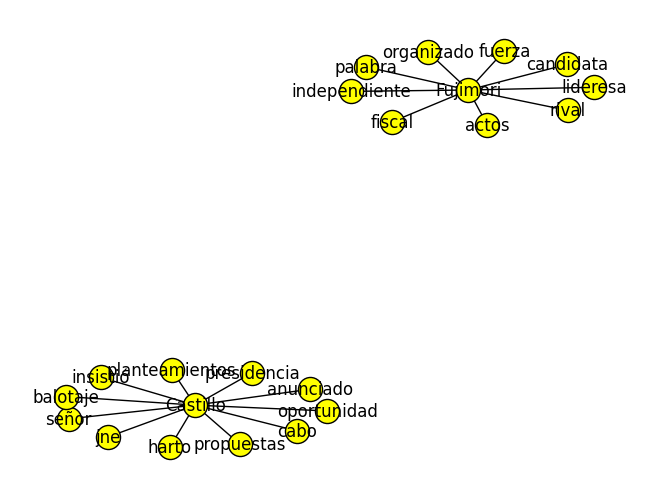

In [17]:
# draw
nx.draw(G=G,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

In [18]:
visualize_graph_with_pyvis(G1, 'graph1.html')

graph1.html


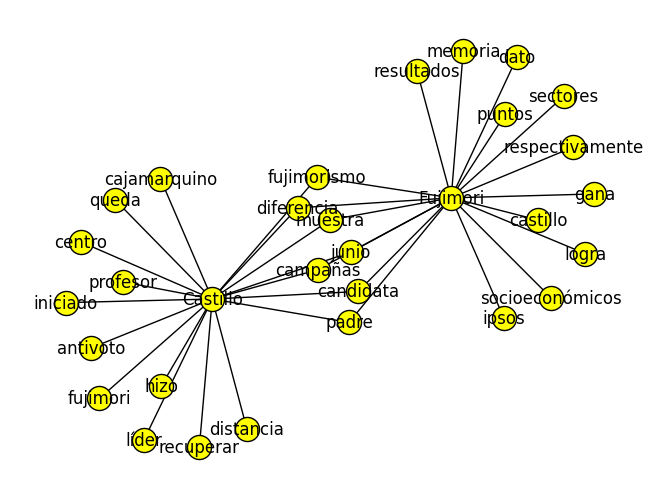

In [19]:
nx.draw(G=G1,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

# Leyendo EC y LR: 2° periodo

In [20]:
with open("elcomercio3mayo_16mayo.txt", "r", encoding="utf-8") as file:
    documents_EC2 = [line.strip() for line in file]  
for doc in documents_EC2:
    print(doc)

mes registró oficialmente primer covid semana después entonces presidente martín vizcarra instauró cuarentenas severas mundo tiempo inició lúgubre rutina día día contar número compatriotas enfermedad llevaba faltaban camas uci pruebas diagnósticas mascarillas oxígeno lado incertidumbre sobraba curva epidemiológica dibujaban diario comportaba autoridades esperaban hiciera ministerio salud minsa demostró incapaz darnos cifras precisas fallecidos sistema informático nacional defunciones sinadef adelantaba contabilizando exceso muertos respecto panorama peor ejecutivo podía describir si creíamos mal entonces mes acaba terminar peor agosto mes letal promedio muertos diarios acuerdo registro minsa número casos promedio día abril promedio muertos contagiados diarios aumentos significativos golpearon fatigado sufrimiento sanitario atizado decirlo crisis políticas revelación tras ‘vacunagate’ traicionados debían cuidarnos dada magnitud sufrimiento humano ocurrido abril supuesto cuenta covid vil

In [21]:
# Abre el archivo en modo lectura con la codificación adecuada
with open("larepublica3mayo_16mayo.txt", "r", encoding="utf-8") as file:
    documents_LR2 = [line.strip() for line in file]  
for doc in documents_LR2:
    print(doc)

partida rafael roncagliolo pérdida democracia rafael roncagliolo duda peruanos contemporáneos ilustres hombre ideas acción consumía fuego siempre causa justa defender batalla ideas emprender compromiso sacar adelante periodista comunicador analista político diplomático académico maestro facetas humano además carisma empatía amigo innumerables amigos noble contendor posible conversar llegar acuerdos roncagliolo adaptó cambios nuevo siglo nunca dejó vanguardia pensamiento hombre moderno ilustrado maestro estrategia analista internacional cumplió cabalidad requerido canciller tiempos reclamo dotado profunda inteligencia hacía gala escuchar atención roncagliolo comunicador social logró integrarse movimiento impulsó pensamiento crítico latinoamericano representado paulo freire josé ramiro beltrán antonio pasquali época continente daba pasos hacia descolonización pensamiento gigante gustavo gutiérrez sentaba bases mirada oprimido teología liberación abrazando grandes pasiones política primer

In [22]:
vectorizer_EC2 = CountVectorizer()
X_EC2 = vectorizer_EC2.fit_transform(documents_EC2)
dtm_EC2 = pd.DataFrame(X_EC2.toarray(), columns=vectorizer_EC2.get_feature_names_out())

In [23]:
assoc_castillo_EC2 = find_associations(dtm_EC2, 'castillo', threshold=0.685361)
assoc_castillo_EC2

instituciones    0.877171
radio            0.866035
señor            0.816964
campaña          0.809315
equipo           0.795601
cercano          0.790931
técnicos         0.790931
terruqueen       0.790931
decisiones       0.790931
exponer          0.790931
trabajado        0.790931
verdad           0.790931
jne              0.790931
plan             0.748798
técnico          0.725998
eventual         0.722250
evidente         0.695852
incluso          0.695852
nuevos           0.691163
jurado           0.691163
postulante       0.691163
cerrón           0.685361
dtype: float64

In [24]:
assoc_fujimori_EC2 = find_associations(dtm_EC2, 'fujimori', threshold=0.812800)
assoc_fujimori_EC2[0:15]

refirió     0.854870
muerte      0.841726
podían      0.841726
perra       0.841726
perfil      0.841726
pasiones    0.841726
padre       0.841726
olvidar     0.841726
odio        0.841726
obvio       0.841726
normal      0.841726
ninguno     0.841726
multitud    0.841726
mrta        0.841726
moderno     0.841726
dtype: float64

In [25]:
G2 = create_association_graph(assoc_castillo_EC2, 'Castillo', assoc_fujimori_EC2[0:15], 'Fujimori')

In [26]:
visualize_graph_with_pyvis(G2, 'graph2.html')

graph2.html


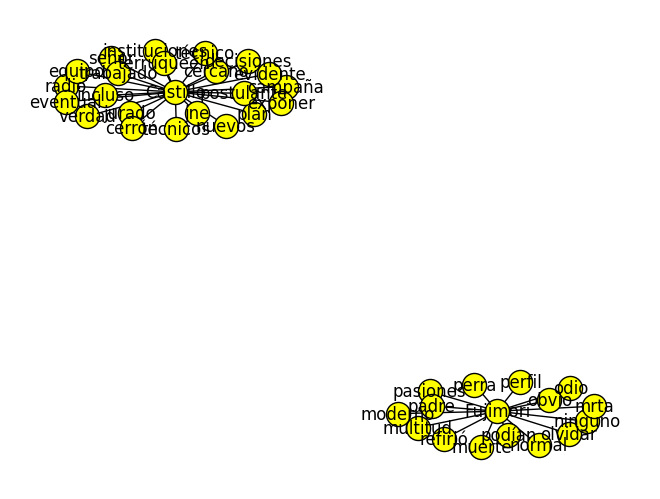

In [27]:
nx.draw(G=G2,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

In [28]:
vectorizer_LR2 = CountVectorizer()
X_LR2 = vectorizer_LR2.fit_transform(documents_LR2)
dtm_LR2 = pd.DataFrame(X_LR2.toarray(), columns=vectorizer_LR2.get_feature_names_out())

In [29]:
assoc_castillo_LR2 = find_associations(dtm_LR2, 'castillo')
assoc_castillo_LR2[0:15]

democrático       0.888604
económico         0.888604
momento           0.854178
lima              0.852265
macrozonas        0.852265
macrorregiones    0.852265
macroeconomía     0.852265
lápiz             0.852265
liderazgo         0.852265
pregunta          0.852265
iep               0.852265
permitido         0.852265
permite           0.852265
parece            0.852265
panorama          0.852265
dtype: float64

In [30]:
assoc_fujimori_LR2 = find_associations(dtm_LR2, 'fujimori')
assoc_fujimori_LR2[0:15]

mantiene     0.857835
sector       0.854579
respaldo     0.851464
quién        0.789441
pueden       0.789441
oriente      0.778528
opinión      0.778528
obtener      0.778528
nulo         0.778528
norte        0.778528
ninguno      0.778528
necesidad    0.778528
miedo        0.778528
oscilando    0.778528
mediática    0.778528
dtype: float64

In [31]:
G3 = create_association_graph(assoc_castillo_LR2[0:15], 'Castillo', assoc_fujimori_LR2[0:15], 'Fujimori')

In [32]:
visualize_graph_with_pyvis(G3, 'graph3.html')

graph3.html


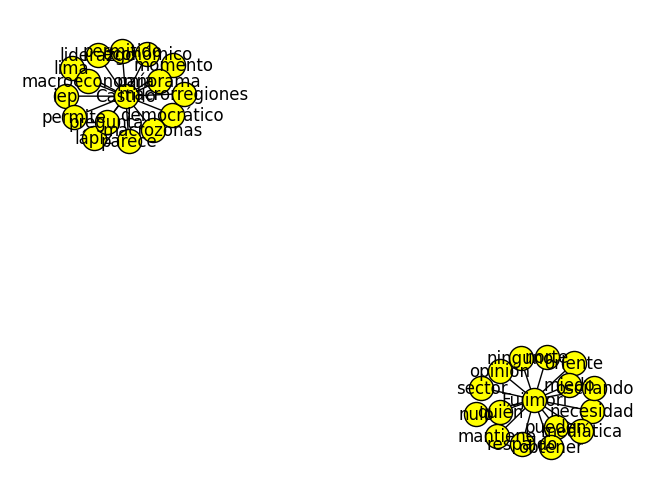

In [33]:
nx.draw(G=G3,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

# Leyendo EC y LR: 3° periodo

In [34]:
with open("elcomercio17mayo_31mayo.txt", "r", encoding="utf-8") as file:
    documents_EC3 = [line.strip() for line in file]  
for doc in documents_EC3:
    print(doc)

primer día antauro humala lideró grupo reservistas ejército captura comisaría andahuaylas objetivo despertar insurrección armada forzara renuncia entonces presidente alejandro toledo convocatoria asamblea constituyente cabo cuatro humala seguidores capturados cuatro policías etnocaceristas fallecieron asonada participación levantamiento antauro humala permanece recluido penal ancón i antecedente relevante nuevo socio político presidencia castillo pasado fin semana etnocaceristas lucían polos mensaje antauro libertad” formaron círculo seguridad docente presentación victoria único evento participado expectativa eventual presidente castillo conceda indulto líder adelantado evaluaría acercamientos extremadamente serios peligrosos antauro humala figura tóxica lejos mostrar arrepentimiento reflexión respecto crímenes mantenido actitud desafiante reglas confinamiento instituto nacional penitenciario inpe sancionó haber intentado utilizar instalaciones penal virgen mercedes recluido exoficial 

In [35]:
with open("larepublica17mayo_31mayo.txt", "r", encoding="utf-8") as file:
    documents_LR3 = [line.strip() for line in file]  
for doc in documents_LR3:
    print(doc)

peruanos crea medios favorecen candidatura campaña porcentaje convencido favorecida señora fujimori habla mal ecosistema mediático actual grave peligro representa percepción democracia datos revela reciente encuesta instituto estudios peruanos iep publicamos edición muestran desequilibrio informativo genera percepción ciudadana llamado alerta medios clase política institucionalidad democrática autoridades electorales ¿ sintiendo gente avalancha apoyo mediático ¿cuánto afecta credibilidad medios comunicación percepción capital medios periodistas credibilidad ¿ denominamos desbalance informativo además busca mostrarnos sola cara moneda manipulación autorregulación democrático mecanismos pro equilibrio informativo busca precisamente garantizar información veraz oportuna objetiva balance informativo tarea delicada época tiempos comicios fundamento democracia ciudadanos informados garantía mejor existen mecanismos difusión garantizan organismos electorales franja destinada misma cantidad ti

**Vectorizando: 3° periodo - EC**

In [36]:
vectorizer_EC3 = CountVectorizer()
X_EC3 = vectorizer_EC3.fit_transform(documents_EC3)
dtm_EC3 = pd.DataFrame(X_EC3.toarray(), columns=vectorizer_EC3.get_feature_names_out())

In [37]:
assoc_fujimori_EC3 = find_associations(dtm_EC3, 'fujimori')
assoc_fujimori_EC3[0:15]

campaña               0.880392
frases                0.855718
diferentes            0.855718
final                 0.855718
postulantes           0.855718
incurrió              0.840511
presión               0.840511
pregunta              0.840511
precisos              0.840511
independientemente    0.840511
pobres                0.840511
incluir               0.840511
inocular              0.840511
idóneos               0.840511
insistió              0.840511
dtype: float64

In [38]:
assoc_castillo_EC3 = find_associations(dtm_EC3, 'castillo')
assoc_castillo_EC3[0:15]

deslindar           0.758076
van                 0.758076
político            0.745606
dicho               0.720026
lápiz               0.710372
presidencia         0.637495
cerrón              0.627102
agrupación          0.614376
antidemocráticas    0.614376
organizaciones      0.614376
legislativo         0.614376
democrático         0.607465
vayan               0.607465
encender            0.607465
hermano             0.607465
dtype: float64

**Creamos gráfica: 3° periodo - EC**

In [39]:
G4 = create_association_graph(assoc_castillo_EC3[0:15], 'Castillo', assoc_fujimori_EC3[0:15], 'Fujimori')

In [40]:
visualize_graph_with_pyvis(G4, 'graph4.html')

graph4.html


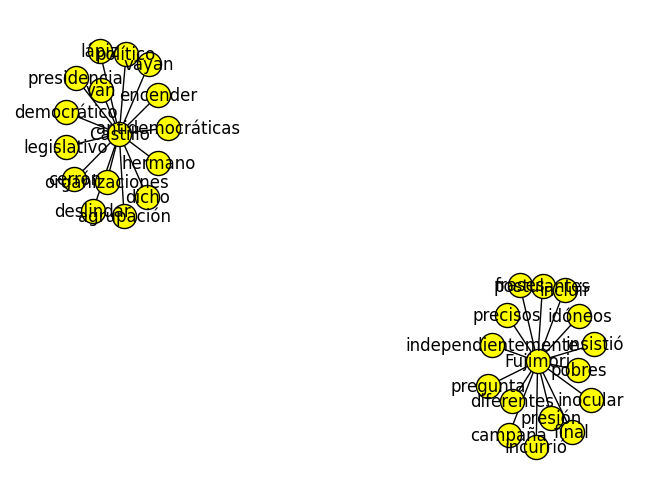

In [41]:
nx.draw(G=G4,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

**Vectorizando: 3° periodo - LR**

In [42]:
vectorizer_LR3 = CountVectorizer()
X_LR3 = vectorizer_LR3.fit_transform(documents_LR3)
dtm_LR3 = pd.DataFrame(X_LR3.toarray(), columns=vectorizer_LR3.get_feature_names_out())

In [43]:
assoc_fujimori_LR3 = find_associations(dtm_LR3, 'fujimori')
assoc_fujimori_LR3[0:15]

votos            0.752947
quién            0.713714
candidata        0.713714
castillo         0.688803
lápiz            0.671607
pandemia         0.663071
propuestas       0.613618
manera           0.596083
económico        0.596083
reactivación     0.596083
simpatizantes    0.556088
último           0.556088
grandes          0.556088
manchar          0.529133
fujimorista      0.529133
dtype: float64

In [44]:
assoc_castillo_LR3 = find_associations(dtm_LR3, 'castillo')
assoc_castillo_LR3[0:15]

semanas        0.819010
votantes       0.799164
decir          0.799164
pareciera      0.799164
operación      0.799164
opción         0.799164
ofrece         0.799164
necesita       0.799164
necesidades    0.799164
persigue       0.799164
principales    0.799164
previas        0.799164
preocupará     0.799164
preguntar      0.799164
pregunta       0.799164
dtype: float64

**Creamos gráfica: 3° periodo - LR**

In [45]:
G5 = create_association_graph(assoc_castillo_LR3[0:15], 'castillo', assoc_fujimori_LR3[0:15], 'fujimori')

In [46]:
visualize_graph_with_pyvis(G5, 'graph5.html')

graph5.html


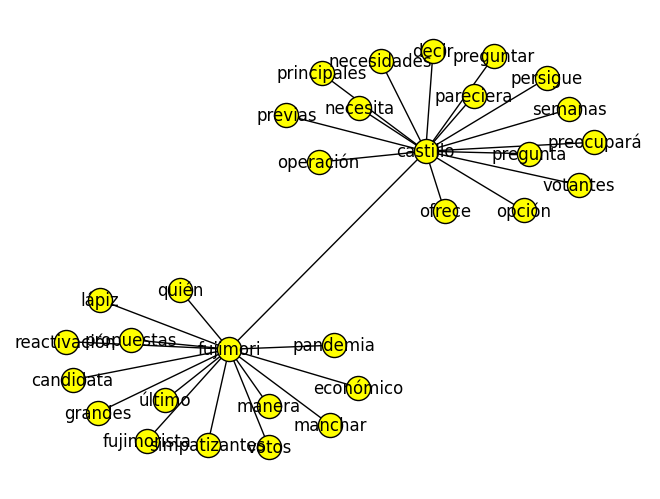

In [47]:
nx.draw(G=G5,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

# Leyendo EC y LR: 4° periodo

In [48]:
with open("elcomercio1junio_7junio.txt", "r", encoding="utf-8") as file:
    documents_EC4 = [line.strip() for line in file]  
for doc in documents_EC4:
    print(doc)

futuro estudien efectos pandemia covid escandalosa cifra fallecimientos relacionados enfermedad aparecerá mancha indeleble historia nacional número muertes alcanza establecido ejecutivo posiblemente cerrará episodio cantidad defunciones respecto tamaño población mundo desastroso resultado atribuible parcialmente malas decisiones gestión vizcarra pasado acuerdo investigación publicada grade brecha defunciones buena errores críticos políticas salud pública gobierno peruano socavaron efectividad cuarentena” tales uso pruebas serológicas ausencia programas rastreo contactos margen gruesas equivocaciones claro condiciones estructurales sistema salud precarias pues frentes siguiente gobierno deberá actuar próximos meses prioridad absoluta avance proceso vacunación paralelo prevención eventual tercera ola contagios fortalecimiento capacidad respuesta sistema oferta oxígeno camas hospitalarias uci personal médico capacitado etc vale recordar cometer errores control virus recién conocía cometer

In [49]:
with open("larepublica1junio_7junio.txt", "r", encoding="utf-8") as file:
    documents_LR4 = [line.strip() for line in file]  
for doc in documents_LR4:
    print(doc)

ofertas electorales último debate requieren explicaciones van financiar cartel redes sintetiza pocas palabras representa populismo quiero regales permíteme trabajar” esencia populismo promesa dádivas inorgánicas generan derechos oferta dice doy dinero oportunidades” remedo justicia social mala broma equidad camuflaje maquilla voluntad cambie finta pirueta galerías expresión política izquierda derecha necesita caudillo poca democracia arcas abiertas versiones versiones modelo gobierno sustituye táperes derechos pisco butifarras versión criolla pan circo romano recibido noche debate arequipa andanada promesas electorales van nuevo impulso programas sociales crearon gobierno ollanta humala ofertas distribución directa bonos personas parientes fallecidos covid transportistas trabajaron pandemia borrarán papeletas préstamos empresarios plazos cinco empezar pagar ejemplo conocido repartición directa canon ofrecido mediante cálculo publica redes acreedor suma determinada si calculando préstam

**Vectorizando: 4° periodo - EC**

In [50]:
vectorizer_EC4 = CountVectorizer()
X_EC4 = vectorizer_EC4.fit_transform(documents_EC4)
dtm_EC4 = pd.DataFrame(X_EC4.toarray(), columns=vectorizer_EC4.get_feature_names_out())

In [51]:
assoc_castillo_EC4 = find_associations(dtm_EC4, 'castillo')
assoc_castillo_EC4[0:15]

hogares           0.881917
cinco             0.881917
nuevos            0.881917
pesar             0.881917
docentes          0.881917
educativo         0.881917
hilo              0.881917
huelga            0.881917
identificarlas    0.881917
imponer           0.881917
inadecuada        0.881917
inaugurar         0.881917
hará              0.881917
incluye           0.881917
ingreso           0.881917
dtype: float64

In [52]:
assoc_fujimori_EC4 = find_associations(dtm_EC4, 'fujimori')
assoc_fujimori_EC4[0:15]

bancada        0.935414
través         0.935414
ley            0.847319
aspirante      0.847319
actitud        0.683130
base           0.683130
ponerlos       0.683130
canales        0.683130
escenario      0.683130
incluso        0.683130
liza           0.683130
oportunidad    0.683130
mejor          0.683130
jefe           0.683130
obligados      0.683130
dtype: float64

**Creamos gráfica: 4° periodo - EC**

In [53]:
G6 = create_association_graph(assoc_castillo_EC4[0:15], 'castillo', assoc_fujimori_EC4[0:15], 'fujimori')

In [54]:
visualize_graph_with_pyvis(G6, 'graph6.html')

graph6.html


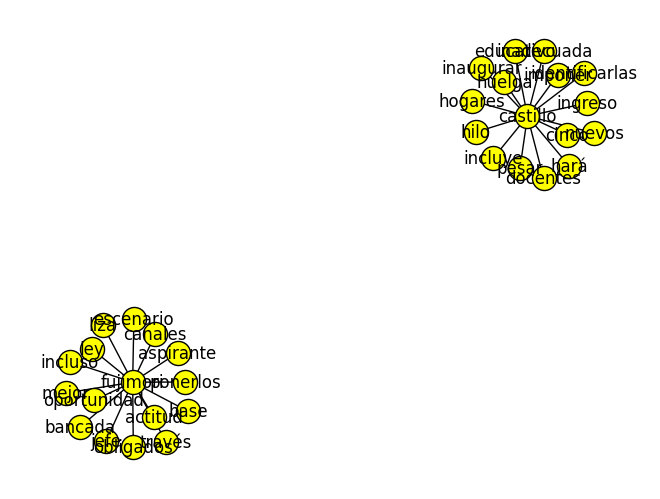

In [55]:
nx.draw(G=G6,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')

**Vectorizando: 4° periodo - LR**

In [56]:
vectorizer_LR4 = CountVectorizer()
X_LR4 = vectorizer_LR4.fit_transform(documents_LR4)
dtm_LR4 = pd.DataFrame(X_LR4.toarray(), columns=vectorizer_LR4.get_feature_names_out())

In [57]:
assoc_castillo_LR4 = find_associations(dtm_LR4, 'castillo')
assoc_castillo_LR4[0:15]

íntegro          1.0
sede             1.0
sentido          1.0
señora           1.0
simpatizantes    1.0
anuncia          1.0
anunciado        1.0
apelaciones      1.0
asegurado        1.0
asistencia       1.0
avalado          1.0
aún              1.0
calma            1.0
celebrar         1.0
certeza          1.0
dtype: float64

In [58]:
assoc_fujimori_LR4 = find_associations(dtm_LR4, 'fujimori')
assoc_fujimori_LR4[0:15]

íntegro          1.0
sede             1.0
sentido          1.0
señora           1.0
simpatizantes    1.0
anuncia          1.0
anunciado        1.0
apelaciones      1.0
asegurado        1.0
asistencia       1.0
avalado          1.0
aún              1.0
calma            1.0
castillo         1.0
celebrar         1.0
dtype: float64

**Creamos gráfica: 4° periodo - LR**

In [59]:
G7 = create_association_graph(assoc_castillo_LR4[0:15], 'castillo', assoc_fujimori_LR4[0:15], 'fujimori')

In [60]:
visualize_graph_with_pyvis(G7, 'graph7.html')

graph7.html


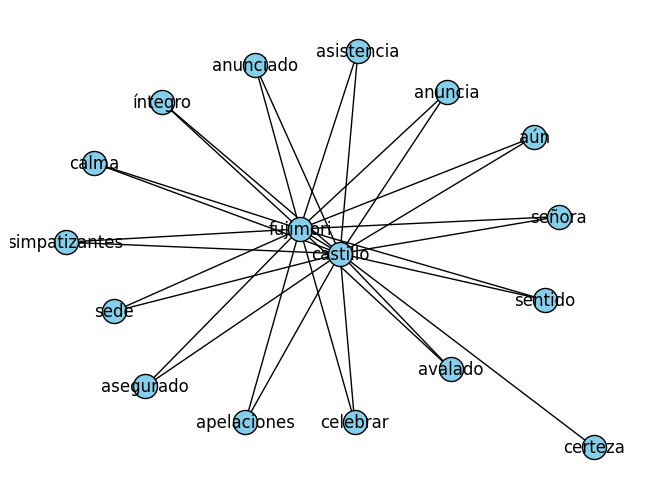

In [61]:
nx.draw(G=G7,
        with_labels=True,
        node_color='skyblue',
        edgecolors='black')

# Leyendo EC y LR: 5° periodo

In [62]:
with open("elcomercio8junio_20julio.txt", "r", encoding="utf-8") as file:
    documents_EC5 = [line.strip() for line in file]  
for doc in documents_EC5:
    print(doc)

nueve atrás temblor fuerte habitual dio buen susto sabe magnitud duración suficiente muchas personas alcanzaran calle tierra movía menos recordó algún episodio sísmico importante temió llegaran extremo terremoto felizmente ocurrió piso dejó temblar réplicas mayoría imperceptibles daños materiales severos si lamentablemente sismo ocasionó fallecimiento niño epilepsia fortuna víctimas raíz mayoría pareció olvidar rápidamente susto volvió rutina normal decir vivir vidas si aquello recordatorio amenaza pende peruanos habitamos territorio ubicado llamado cinturón fuego pacífico concentra cerca actividad sísmica mundial grave particularmente si consideramos señaló jefe instituto geofísico igp hernando tavera reciente temblor supuso liberación energía acumulada placas tectónicas lima viene experimentando silencio sísmico” extendido terremoto pisco casi precisó especialista liberó solamente energía acumulada existía momento manera imaginar catástrofe podría desatarse capital lugares evento pro

In [63]:
with open("larepublica8junio_20julio.txt", "r", encoding="utf-8") as file:
    documents_LR5 = [line.strip() for line in file]  
for doc in documents_LR5:
    print(doc)

logran imponer censura reformas exprés congreso van tc resultados congreso señal inequívoca fracaso golpismo ensayado varios escenarios aprovechar desestabilización generada fujimori negativa admitir resultados electorales decisión seguir alentando teoría fraude golpismo parlamentario — logró elección manuel merino— quiso probar suerte intentó censurar presidenta congreso mirtha vásquez menos entrada nueva representación nacional votos abjuró intentona primer momento objetivo final propio presidente sagasti luego centró ataque mesa directiva conjunto incluir mandatario votación dieron mano representantes acción popular app parlamentarios podemos congresista fujimorismo fuerza popular unión coalición casi misma noviembre quiso imponer dictablanda” sangre fuego tampoco lograron votos requeridos sacar adelante interpretación auténtica modificación cuestión confianza proyecto ley blindaje diseñado vuelva presentar figura provocó cierre congreso mitad período elección nuevo voluntad común a

**Vectorizando: 5° periodo - EC**

In [64]:
vectorizer_EC5 = CountVectorizer()
X_EC5 = vectorizer_EC5.fit_transform(documents_EC5)
dtm_EC5 = pd.DataFrame(X_EC5.toarray(), columns=vectorizer_EC5.get_feature_names_out())

In [65]:
assoc_castillo_EC5 = find_associations(dtm_EC5, 'castillo')
assoc_castillo_EC5[0:15]

compañía      0.644859
partido       0.644480
vladimir      0.547703
discurso      0.531646
lápiz         0.525462
agrupación    0.521215
presidente    0.518221
dtype: float64

In [66]:
assoc_fujimori_EC5 = find_associations(dtm_EC5, 'fujimori')
assoc_fujimori_EC5[0:15]

ajustada     0.633707
habla        0.633707
falso        0.633707
vencedor     0.633707
supo         0.633707
vivo         0.633707
derrota      0.631921
nulidad      0.565839
candidata    0.559307
aceptar      0.559307
miércoles    0.559307
jne          0.516771
perder       0.514264
recursos     0.500981
dtype: float64

**Creamos gráfica: 5° periodo - EC**

In [67]:
G8 = create_association_graph(assoc_castillo_EC5[0:15], 'castillo', assoc_fujimori_EC5[0:15], 'fujimori')

In [68]:
visualize_graph_with_pyvis(G8, 'graph8.html')

graph8.html


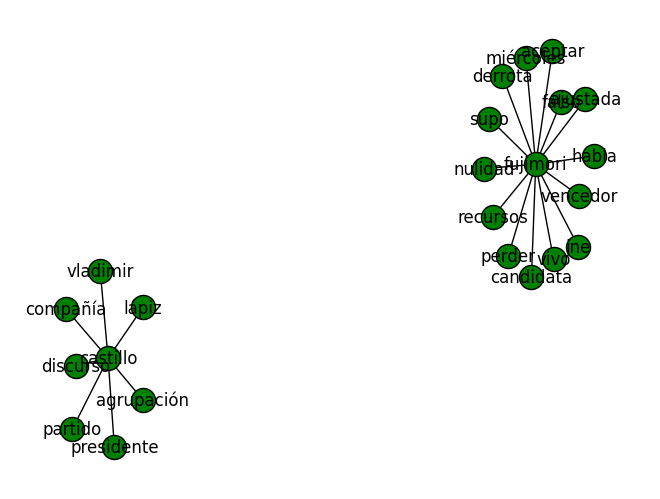

In [69]:
nx.draw(G=G8,
        with_labels=True,
        node_color='green',
        edgecolors='black')

**Vectorizando: 5° periodo - LR**

In [70]:
vectorizer_LR5 = CountVectorizer()
X_LR5 = vectorizer_LR5.fit_transform(documents_LR5)
dtm_LR5 = pd.DataFrame(X_LR5.toarray(), columns=vectorizer_LR5.get_feature_names_out())

In [71]:
assoc_castillo_LR5 = find_associations(dtm_LR5, 'castillo')
assoc_castillo_LR5[0:15]

zonas         0.779885
dice          0.682854
ciudades      0.646876
iglesia       0.646876
pobres        0.646876
propaganda    0.646876
promulgado    0.646876
actuar        0.646876
roma          0.646876
robar         0.646876
satanizar     0.646876
santa         0.646876
claramente    0.646876
considerar    0.646876
dejemos       0.646876
dtype: float64

In [72]:
assoc_fujimori_LR5 = find_associations(dtm_LR5, 'fujimori')
assoc_fujimori_LR5[0:15]

área              0.757951
actitudes         0.757951
propicio          0.757951
publicó           0.757951
realizada         0.757951
realizó           0.757951
responde          0.757951
revela            0.757951
comportamiento    0.757951
construyéndose    0.757951
desaprobación     0.757951
desaprobadas      0.757951
despierta         0.757951
devuelva          0.757951
difícil           0.757951
dtype: float64

**Creamos gráfica: 5° periodo - LR**

In [73]:
G9 = create_association_graph(assoc_castillo_LR5[0:15], 'castillo', assoc_fujimori_LR5[0:15], 'fujimori')

In [74]:
visualize_graph_with_pyvis(G9, 'graph9.html')

graph9.html


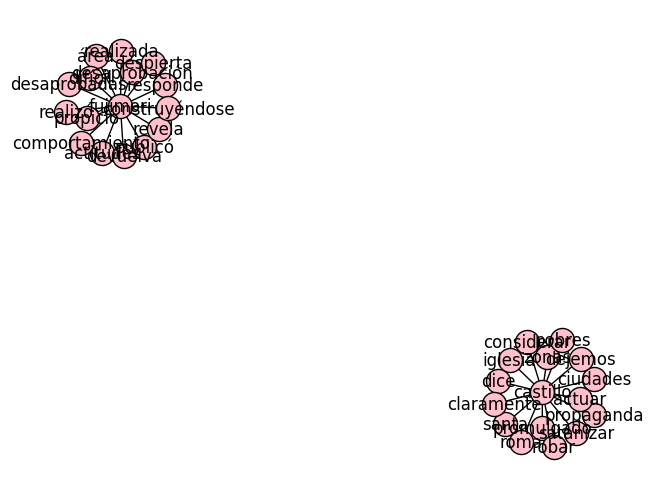

In [75]:
nx.draw(G=G9,
        with_labels=True,
        node_color='pink',
        edgecolors='black')